In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('crypto.csv', header=[0, 1], index_col=0, parse_dates=[0])
# df.head()

In [29]:
df.columns = [(col[0].lower(), col[1].lower()) for col in df.columns]
# df.head()

In [30]:
df = df.reset_index().copy()
# df.head()

In [31]:
df = df.melt(id_vars = 'Date', var_name = 'Column', value_name = 'Value').copy()
# df.head()

In [32]:
df['Metric'] = df['Column'].apply(lambda x: x[0]).copy()
df['Ticker'] = df['Column'].apply(lambda x: x[1]).copy()
# df.head()

In [33]:
df = df.drop('Column', axis=1).copy()
# df.head()

In [34]:
df_price_btc = df[(df['Metric'] == 'close') & (df['Ticker'] == 'btc')]
# df_price_btc.head()

In [35]:
df_price_eth = df[(df['Metric'] == 'close') & (df['Ticker'] == 'eth')]
# df_price_eth.head()

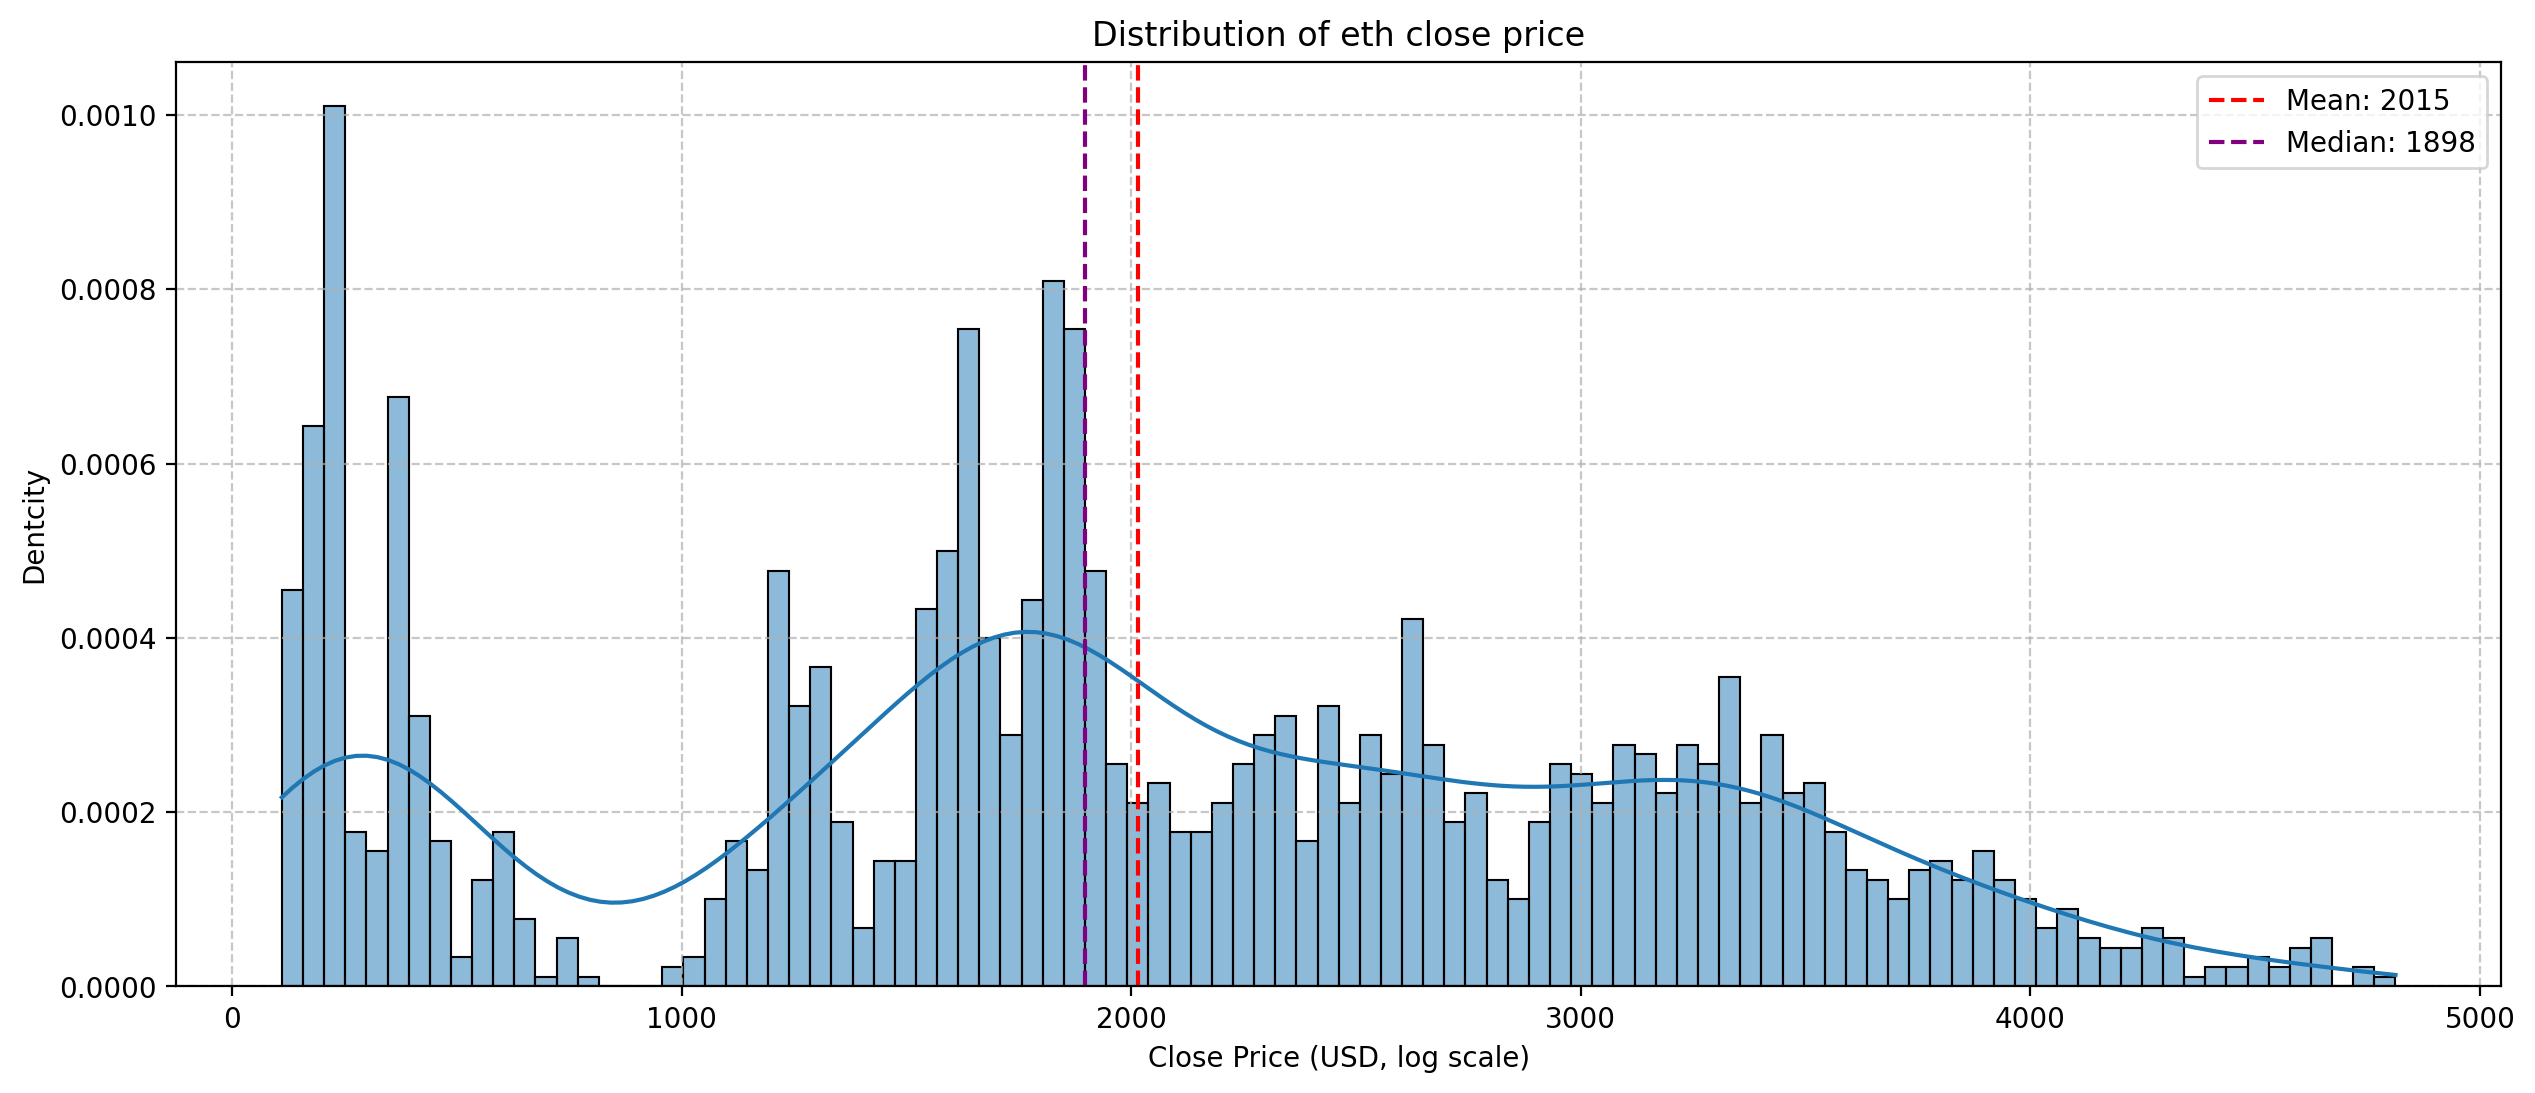

In [41]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=200)

sns.histplot(data=df_price_eth, x='Value', bins=100, kde=True, stat='density')

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('Distribution of eth close price')
# ax.set_xscale('log')
ax.set_xlabel('Close Price (USD, log scale)')
ax.set_ylabel('Dentcity')

mean_price = df_price_eth['Value'].mean()
median_price = df_price_eth['Value'].median()
ax.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.0f}')
ax.axvline(median_price, color='purple', linestyle='--', label=f'Median: {median_price:.0f}')
ax.legend()

fig.savefig('eth-distribution.png', dpi=300, bbox_inches='tight')

plt.show()

Вот основные варианты для stat в sns.histplot:
'count' (по умолчанию): Высота столбцов показывает количество наблюдений в каждом бине (интервале). Сумма высот равна общему числу наблюдений.<br>
'density': Высота столбцов нормализуется так, что площадь всей гистограммы равна 1. Это полезно для сравнения с KDE (оценкой плотности ядра), так как KDE тоже имеет площадь, равную 1.<br>
'probability': Высота столбцов нормализуется так, что сумма высот всех столбцов равна 1 (но не площадь).<br>
'percent': Похоже на 'probability', но высота выражена в процентах (сумма высот = 100).<br>
'frequency': Высота столбцов показывает частоту наблюдений, делённую на ширину бина.